In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, Normalize
import matplotlib.patheffects as path_effects
from shapely.geometry import Point, mapping, box
import rasterio
from rasterio.mask import mask
import matplotlib.patches as patches
from matplotlib.patches import Patch
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from matplotlib.patches import Rectangle, FancyBboxPatch
import matplotlib.patheffects as pe

## Import Volcano Catalogue and reproject coordinates

In [2]:
volcano_data = pd.read_csv("Data_Inputs/Data_Completeness_Scores_CH.csv", encoding="latin1")

volcano_df = pd.DataFrame(volcano_data)

volcano_gdf = gpd.GeoDataFrame(
    volcano_df, 
    geometry=gpd.points_from_xy(volcano_df["LON_CENTRE"], volcano_df["LAT_CENTRE"]),
    crs="EPSG:4326"
)

volplot = volcano_df["Total data availability score"]


C:\Users\User\AppData\Local\Temp\ipykernel_17160\3392434988.py:1: DtypeWarning: Columns (0,1,2,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  volcano_data = pd.read_csv("Data_Inputs/Data_Completeness_Scores_CH.csv", encoding="latin1")


## Plot Histogram

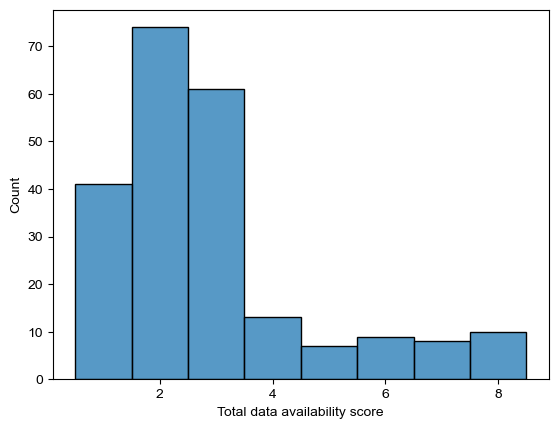

In [3]:

ax = sns.histplot(data=volplot, discrete=True)
sns.set_theme(style="darkgrid")
ax.set_xticks([2, 4, 6, 8])
plt.savefig("DataMap_Outputs/DataCompletenessPlot.png", dpi=600, bbox_inches="tight",  
    pad_inches=0.2)

# Mapping Data Availability Sores

## Insert Variables and Reproject

In [4]:
LGAS= gpd.read_file("NVP_Locations/VIC_SA_LGAs_NVP.gpkg")
colac_lin = gpd.read_file("NVP_Locations/colac_lineament.gpkg")
shapefile = gpd.read_file("Aus_Shapefile/STE_2021_AUST_GDA2020.shp")
CH = gpd.read_file("NVP_Locations/subProvincesAndRegions.gdb", layer="CentralHighlands")
CH = CH.to_crs(LGAS.crs)

## Colour Map

In [5]:
ranking_labels = list(range(1,9))
color_map = {
    1: "#d73027",  
    2: "#f46d43",       
    3: "#fdae61",   
    4: "#fee08b",
    5: "#d9ef8b",
    6: "#a6d96a",
    7: "#66bd63",
    8: "#1a9850"
    
}
volcano_gdf["color"] = volcano_gdf["Total data availability score"].map(color_map)
colors = volcano_gdf["color"].tolist()
color_list = [ color_map[i] for i in ranking_labels ]
cmap       = ListedColormap(color_list)
norm = Normalize(vmin=1, vmax=8)
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([]) 

## Add legend handles

In [6]:
CH_proxy = Patch(facecolor='#ef78ff', edgecolor='#b102c9', label='Central Highlands Subprovince')
handles = [CH_proxy]

## Mapping

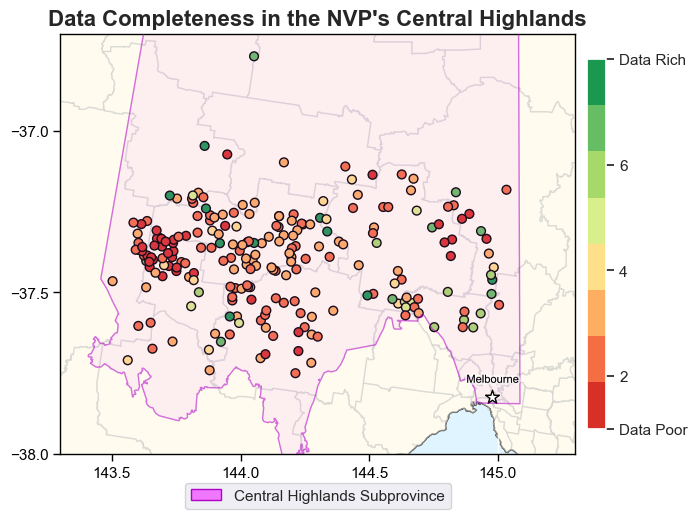

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
LGAS.plot(ax=ax,color='#fffbe0', edgecolor='#CCCCCC', zorder=1, alpha=0.5)
shapefile.plot(ax=ax, color='white',edgecolor='black', zorder=0)
CH.plot(ax=ax, color='#ef78ff', edgecolor='#b102c9', alpha=0.1, zorder=2)
CH.plot(ax=ax, facecolor='none', edgecolor='#b102c9', zorder=4, alpha=0.5)

ax.legend(handles=handles, frameon=True,loc='center',bbox_to_anchor=(0.5,-0.1), ncol=3)

volcano_gdf.plot(
    ax         = ax,
    column     = "Total data availability score",
    cmap       = ListedColormap(color_list),  
    markersize = 40,
    edgecolor  = "black",
    norm       = norm,                       
    zorder     = 1
)

ax.scatter(144.97806, -37.8240, facecolor='white', edgecolor='black', zorder=3, marker='*',  s=110) #Melbourne
Melbourne = ax.annotate(
    'Melbourne',          
    xy=(144.97806, -37.8240),              
    xytext=(144.98, -37.78),          
    fontsize=8,
    color='black',
    ha="center", zorder=5
)
Melbourne.set_path_effects([
    path_effects.Stroke(linewidth=3, foreground=(1, 1, 1, 0.6)),
    path_effects.Normal()
    ])

cbar = fig.colorbar(
    sm,
    ax     = ax,
    ticks  = [1,2,4,6,8],
    shrink = 0.8,
    pad    = 0.02
)

cbar.ax.set_yticklabels([
    "Data Poor",
    "2",
    "4",
    "6",
    "Data Rich"
])

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1)
    spine.set_edgecolor("black")


ax.set_facecolor('#e0f4ff')
ax.set_xlim(143.3, 145.3)
ax.set_ylim(-38,-36.7)
ax.set_xticks([143.5, 144, 144.5, 145])
ax.set_yticks([-37, -37.5, -38])
ax.tick_params(axis="both", which="both", direction="out", length=5, width=1, colors="black")
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_title("Data Completeness in the NVP's Central Highlands", fontweight='bold',fontsize=16)

ax.set_axis_on()


plt.savefig("DataMap_Outputs/CH_DataCompleteness_Map.png", dpi=600, bbox_inches="tight",  
    pad_inches=0.2)
plt.show()